<a href="https://colab.research.google.com/github/JoaoDouradoLA/Bank-Costumers/blob/master/Bank_Costumers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Naive Bayes

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
Bank = pd.read_csv('Churn Modeling.csv', index_col=0)
Bank

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [0]:
#Bank.replace(('Male', 'Female'), (1, 0), inplace=True)

In [0]:
from sklearn.naive_bayes import GaussianNB # 1
model_bayes = GaussianNB()                 # 2

In [67]:
XBank = Bank.loc[: ,  ["Age", "Tenure",	"NumOfProducts", "HasCrCard", "IsActiveMember"] ] # 3.1
XBank.head()

,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember
RowNumber,,,,,
1,42,2,1,1,1
2,41,1,1,0,1
3,42,8,3,1,0
4,39,1,2,0,0
5,43,2,1,1,1


In [68]:
YBank = Bank.Exited # 3.2 Target array
YBank.head()

RowNumber
1    1
2    0
3    1
4    0
5    0
Name: Exited, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
train1, test1, train2, test2 = train_test_split(XBank, YBank, random_state=2020)

In [70]:
model_bayes.fit(train1, train2) # 4

GaussianNB(priors=None, var_smoothing=1e-09)

In [71]:
m_bayes = model_bayes.predict(test1) # 5
m_bayes

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(test2, m_bayes)

0.8156

Decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier  # 1
model_decision = DecisionTreeClassifier()       # 2
                                                 # 3(Presente na Parte 1)  
model_decision.fit(train1, train2)              # 4

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
Decision = model_decision.predict(test1) # 5

In [75]:
accuracy_score(test2, Decision)

0.8056

KNeighbors/Cross Validation/Leave One Out

In [76]:
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier
model_neighbors = KNeighborsClassifier(n_neighbors=1)
cross_val_score(model_neighbors, XBank, YBank, cv = 5)

array([0.78  , 0.7755, 0.7685, 0.7715, 0.768 ])

In [77]:
model_bayes_cv = GaussianNB()                 # Hiperparâmetros e Instanciação
cross_val_score(model_bayes_cv, XBank, YBank, cv = 5)

array([0.8205, 0.821 , 0.822 , 0.8265, 0.8155])

In [78]:
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model_bayes_cv, XBank, YBank, cv=LeaveOneOut())
scores.mean()

0.8218

Text(83.40000000000006, 0.5, 'Valores Reais')

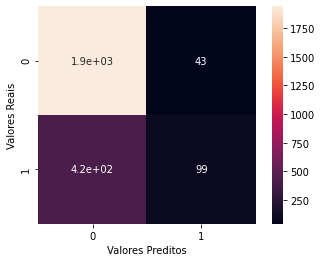

In [79]:
from sklearn.metrics import confusion_matrix
mat_bayes = confusion_matrix(test2, m_bayes)
sns.heatmap(mat_bayes, square=True, annot=True)
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')

Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier   #1
classifier_rf = RandomForestClassifier(random_state=1986, criterion='gini',
                                       max_depth=10, n_estimators=50,
                                       n_jobs=-1
                                       )   #2

In [81]:
scores = cross_val_score(classifier_rf, train1, train2,
                         scoring='accuracy', cv=5)
scores.mean()

0.8537333333333332